In [50]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt 
import warnings as warnings
warnings.filterwarnings("ignore")

# We are going to use KMeans Clustering as the data set is huge.

In [177]:
df=pd.read_excel("train.xlsx",nrows=1000)

In [178]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [179]:
df.drop_duplicates(keep='first',inplace=True)

In [180]:
df.isnull().sum().sum()

0

In [185]:
df.duplicated().sum()

0

In [187]:
X=df.iloc[:,[1,2]].values

In [189]:
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

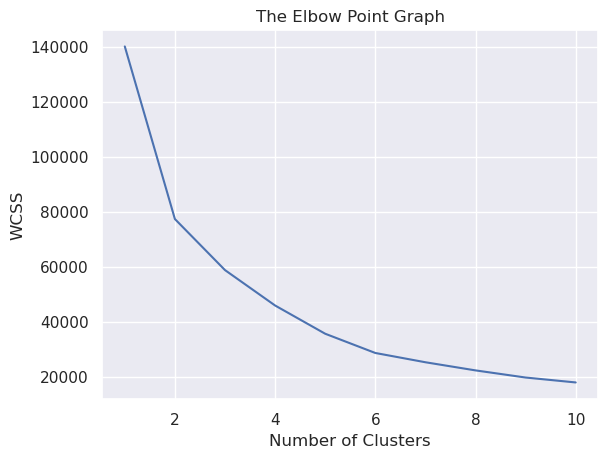

In [191]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [201]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[1 2 3 3 0 0 0 0 2 0 1 1 0 2 1 1 2 3 3 3 1 1 0 2 3 3 1 0 3 0 3 2 0 0 0 0 2
 3 2 3 1 2 3 1 1 0 1 0 0 2 3 0 3 1 0 2 0 1 0 2 1 2 0 0 3 2 3 1 3 0 3 3 0 0
 1 3 3 0 3 3 0 3 3 0 1 1 3 3 1 3 2 1 1 3 3 0 3 0 0 2 0 3 1 0 3 3 0 0 2 1 3
 2 0 0 0 3 1 3 3 1 3 1 3 2 1 0 0 0 0 0 1 3 3 3 1 1 0 2 2 1 0 0 0 3 3 0 0 3
 1 2 2 2 0 2 1 3 1 2 1 0 0 3 3 3 1 3 3 2 0 3 0 0 3 3 0 1 1 1 1 0 1 0 2 3 2
 3 3 1 3 0 1 1 2 3 3 3 2 1 3 3 1 2 2 3 0 1 2 0 3 0 0 3 3 2 3 0 3 0 0 0 1 1
 0 0 2 1 2 3 3 1 3 1 2 2 0 0 1 0 3 0 0 3 1 0 1 0 1 0 3 3 1 3 1 0 1 2 0 1 0
 1 1 3 3 1 0 3 3 1 1 0 2 3 2 3 1 3 3 1 0 1 2 2 0 1 1 3 2 0 3 2 1 0 2 3 1 3
 1 0 3 0 3 0 0 1 0 1 2 2 3 0 0 3 2 0 3 1 0 1 0 2 3 0 0 1 1 0 2 2 2 0 2 2 0
 3 2 1 3 0 1 2 2 2 1 0 2 1 2 1 3 1 1 1 3 1 3 0 0 3 0 0 1 1 2 1 3 0 0 1 1 1
 0 3 1 1 3 0 1 2 2 2 0 1 1 2 2 0 3 1 0 3 3 1 3 3 1 0 1 3 3 2 3 1 3 2 3 0 3
 0 1 2 3 3 0 3 3 1 1 3 1 3 2 0 3 1 1 0 2 1 0 1 2 3 0 0 2 0 3 1 3 3 2 3 0 2
 2 3 0 3 2 2 3 0 1 0 0 0 3 2 1 2 3 2 0 0 1 1 2 2 0 2 2 0 3 0 3 1 1 3 2 0 3
 3 2 0 2 0 1 3 0 1 0 1 3 

In [203]:
df['cluster_1']=Y

In [205]:
df1=df[df['cluster_1']==0]
df2=df[df['cluster_1']==1]
df3=df[df['cluster_1']==2]
df4=df[df['cluster_1']==3]

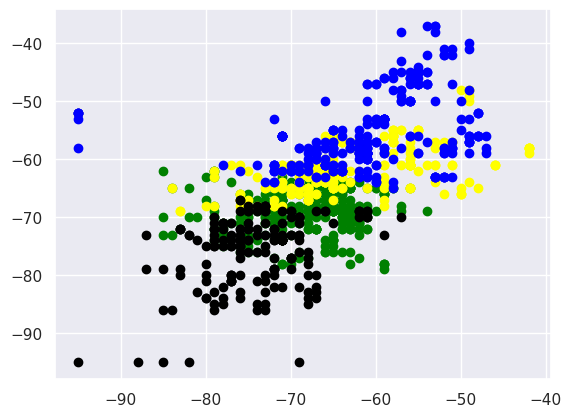

In [207]:
plt.scatter(df1.T1,df1.T2,color="green")
plt.scatter(df2.T1,df2.T2,color="yellow")
plt.scatter(df3.T1,df3.T2,color="black")
plt.scatter(df4.T1,df4.T2,color="blue")

In [221]:
# count of first 5 feature

<Axes: xlabel='target'>

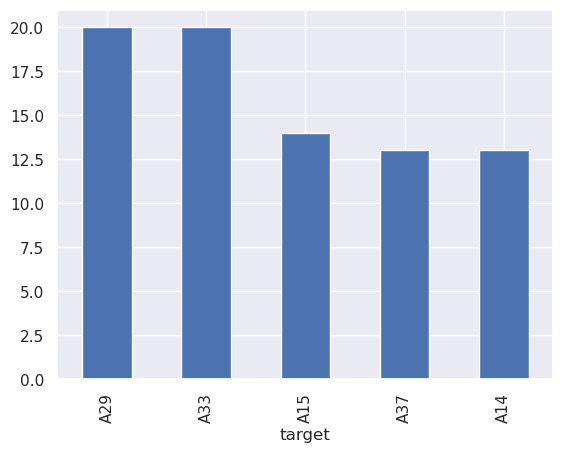

In [219]:
df['target'].value_counts()[:5].plot(kind="bar")